In [335]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

In [336]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_classes=3,
                           n_clusters_per_class=1, shift=4.77, scale=3.92, class_sep=1, random_state=2, )

<AxesSubplot: >

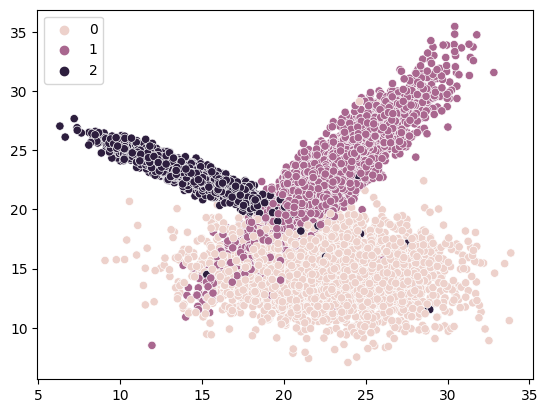

In [337]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.4, 
                                                    random_state=42, )

In [339]:
X_train.shape

(6000, 2)

### Метод парзеновского окна

$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] w(i,u) $$

$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$





$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr) $$

In [340]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RadiusNeighborsClassifier(radius=0.1, weights='distance', p=2, outlier_label=-1))
])

In [341]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 RadiusNeighborsClassifier(outlier_label=-1, radius=0.1,
                                           weights='distance'))])

In [342]:
preds_test = pipe.predict(X_test)
preds_train = pipe.predict(X_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:696: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


In [343]:
print('[TRAIN] Precision macro', precision_score(y_train, preds_train, average='macro'))
print('[TEST] Precision macro', precision_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] Recall macro', recall_score(y_train, preds_train, average='macro'))
print('[TEST] Recall macro', recall_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] F1 macro', f1_score(y_train, preds_train, average='macro'))
print('[TEST] F1 macro', f1_score(y_test, preds_test, average='macro'))


[TRAIN] Precision macro 1.0
[TEST] Precision macro 0.7105739305538454

[TRAIN] Recall macro 1.0
[TEST] Recall macro 0.6988224248844881

[TRAIN] F1 macro 1.0
[TEST] F1 macro 0.7045566144610577


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [344]:
pipe.predict([[30, 30]])

array([1])

In [345]:
pipe.predict([[10, 25]])

array([2])

In [346]:
pipe.predict([[30, 10]])

array([0])

In [29]:
pipe.predict([[100000, 20]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:696: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


array([-1])

### Ядра

![pic](../pics/image012.jpg )



| Ядро    | Формула |
| --------: | :------- |
|Епанечникова|	$$K_1(r)=E(r)=\frac{3}{4}(1-r^2){[}{|}r{|}<=1{]}$$|
|Квартическое|	$$K_2(r)=Q(r)=\frac{15}{16}(1-r^2)^2{[}{|}r{|}<=1{]}$$|
|Треугольное|	$$K_3(r)=T(r)=(1-{|}r{|}){[}{|}r{|}<=1{]}$$|
|Гауссовское|	$$K_4(r)=G(r)=(2\pi)^{(-\frac{1}{2})}exp(-\frac{1}{2}r^2)$$|
|Прямоугольное|	$$K_5(r)=\Pi(r)=\frac{1}{2}{[}{|}r{|}<=1{]}$$|



In [351]:
import numpy as np

In [352]:
def kernel_epanechnikov(distances):
    return ((3/4) * (1-np.power(distances, 2))) * (np.abs(distances) <= 1)

def kernel_squared(distances):
    return (15/16) * np.power(1-np.power(distances, 2), 2) * (np.abs(distances) <= 1)

def kernel_triangle(distances):
    return (1 - np.abs(distances)) * (np.abs(distances) <= 1)

def kernel_gaussian(distances):
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(distances, 2))

def kernel_rectangle(distances):
    return 0.5 * (np.abs(distances) <= 1)

In [353]:
x = np.linspace(-1.1, 1.1, 100)
y1 = kernel_epanechnikov(x)
y2 = kernel_squared(x)
y3 = kernel_triangle(x)
y4 = kernel_gaussian(x)
y5 = kernel_rectangle(x)

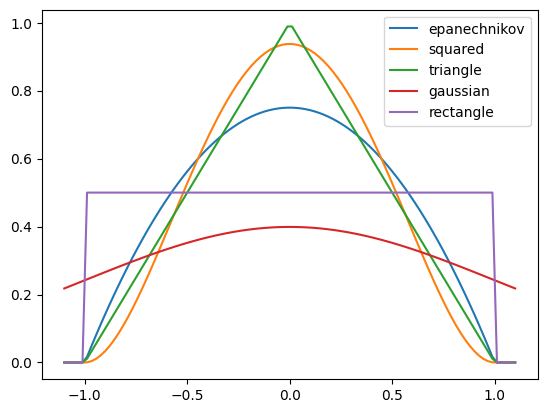

In [354]:
plt.plot(x, y1, label='epanechnikov')
plt.plot(x, y2, label='squared')
plt.plot(x, y3, label='triangle')
plt.plot(x, y4, label='gaussian')
plt.plot(x, y5, label='rectangle')

plt.legend()

In [355]:
def kernel_epanechnikov(distances):
    return ((3/4) * (1-np.power(distances, 2))) #* (np.abs(distances) <= 1)

def kernel_squared(distances):
    return (15/16) * np.power(1-np.power(distances, 2), 2) #* (np.abs(distances) <= 1)

def kernel_triangle(distances):
    return (1 - np.abs(distances)) # * (np.abs(distances) <= 1)

def kernel_gaussian(distances):
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(distances, 2))

def kernel_rectangle(distances):
    return 0.5 #* (np.abs(distances) <= 1)

In [370]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RadiusNeighborsClassifier(radius=0.2, weights=kernel_epanechnikov, p=2, outlier_label=-1, ))
])

In [371]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 RadiusNeighborsClassifier(outlier_label=-1, radius=0.2,
                                           weights=<function kernel_epanechnikov at 0x2955620e0>))])

In [372]:
preds = pipe.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:696: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


In [373]:
preds[preds == -1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<AxesSubplot: >

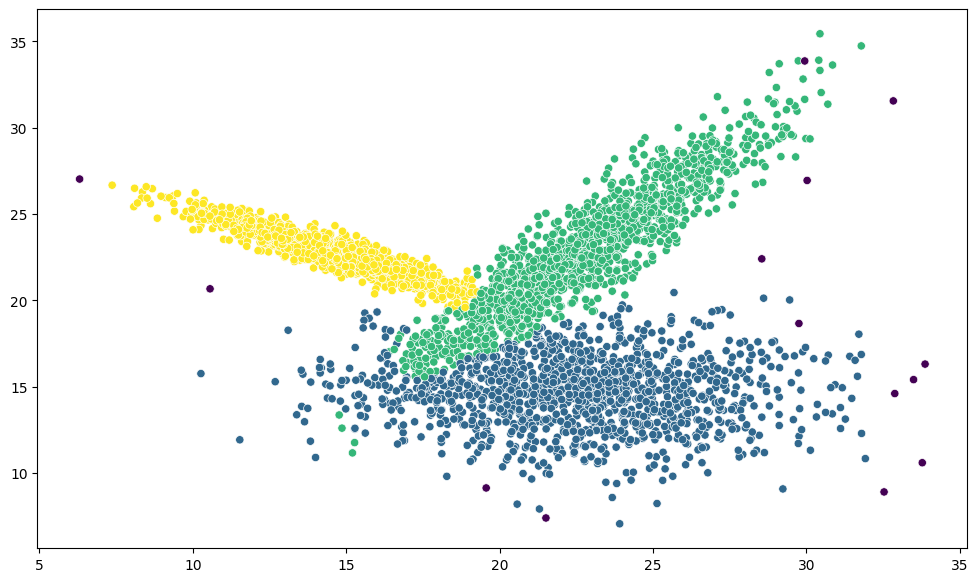

In [374]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], c=preds, legend='full', ax=ax)

### Функции потерь

In [51]:
from sklearn.metrics import log_loss, hinge_loss, zero_one_loss

Hinge Loss
$$ max(0, 1 - y \cdot \hat{y}) $$

Logistic Loss 
$$ -\sum_{c=1}^My_{o,c}\log(p_{o,c}) $$

0-1 Loss
$$ -\sum_{c=1}^{M-1} 1 [y_i \neq \hat{y}_i]$$

In [375]:
from tqdm.notebook import tqdm

In [376]:
x = list(range(1, 121, 2))
ll_train = []
ll_test = []
hl_train = []
hl_test = []
zol_train = []
zol_test = []

for n_neighbors in tqdm(x):
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform', p=2))
    ])
    
    pipe.fit(X_train, y_train)
    preds_train = pipe.predict(X_train)
    preds_test = pipe.predict(X_test)
    probas_train = pipe.predict_proba(X_train)
    probas_test = pipe.predict_proba(X_test)
    
    zerooneloss = zero_one_loss(y_train, preds_train)
    zol_train.append(zerooneloss)
    zerooneloss = zero_one_loss(y_test, preds_test)
    zol_test.append(zerooneloss)
    
    hingeloss = hinge_loss(y_train, probas_train)
    hl_train.append(hingeloss)
    hingeloss = hinge_loss(y_test, probas_test)
    hl_test.append(hingeloss)
    
    logloss = log_loss(y_train, probas_train)
    ll_train.append(logloss)
    logloss = log_loss(y_test, probas_test)
    ll_test.append(logloss)
    

  0%|          | 0/60 [00:00<?, ?it/s]

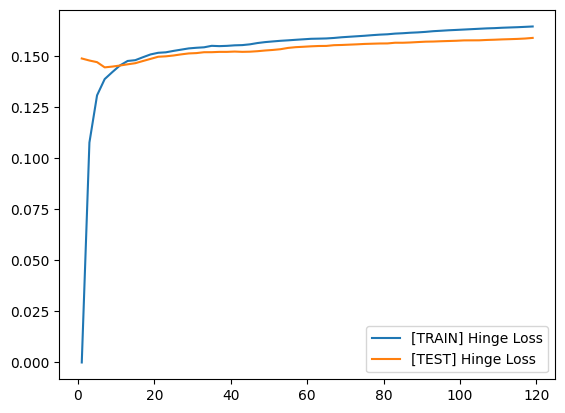

In [380]:
# plt.plot(x, ll_train, label='[TRAIN] Log Loss')
plt.plot(x, hl_train, label='[TRAIN] Hinge Loss')
# plt.plot(x, zol_train, label='[TRAIN] 0-1 Loss')
# plt.plot(x, ll_test, label='[TEST] Log Loss')
plt.plot(x, hl_test, label='[TEST] Hinge Loss')
# plt.plot(x, zol_test, label='[TEST] 0-1 Loss')
plt.legend()

### ECOC (Error-Correcting Output Coding) Design

In [381]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.linear_model import LogisticRegression

In [406]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_classes=3,
                           n_clusters_per_class=1, shift=4.77, scale=3.92, class_sep=2, random_state=42, )

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.3, 
                                                    random_state=42, )

<AxesSubplot: >

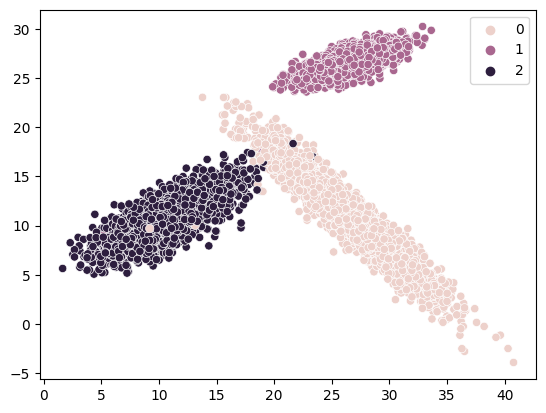

In [407]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [408]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', OneVsOneClassifier(LogisticRegression()))
])

In [409]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf', OneVsOneClassifier(estimator=LogisticRegression()))])

/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_88974/897004403.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


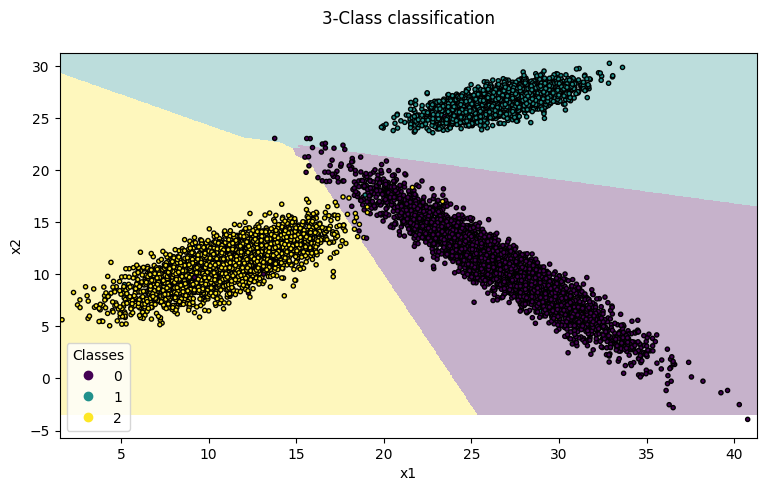

In [412]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


fig, ax = plt.subplots(figsize=(9, 5))
disp = DecisionBoundaryDisplay.from_estimator(
    pipe,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    grid_resolution=1000,
    xlabel='x1',
    ylabel='x2',
    shading="auto",
    alpha=0.3,
    ax=ax,
)
scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker='.')
disp.ax_.legend(
    scatter.legend_elements()[0],
    [0, 1, 2],
    loc="lower left",
    title="Classes",
)
disp.ax_.set_title(
    f"3-Class classification\n"
)

fig.show()

In [413]:
n_classes = 3

In [415]:
coding_matrix_ova = np.array([
    [ 1, -1, -1],
    [-1,  1, -1],
    [-1, -1,  1],
])

coding_matrix_ovo = np.array([
    [ 0,  1,  1],
    [ 1,  0, -1],
    [-1, -1,  0],
])

coding_matrix_full = np.array([
    [-1, -1, -1,  1,  1,  1],
    [-1,  1,  1, -1, -1,  1],
    [ 1, -1,  1, -1,  1, -1],
])

In [416]:
def prepare_dataset(X, y, coding_design):
    y_new = np.zeros_like(y)
    dropped = np.zeros_like(y)
    X_new = X.copy()
    for class_label, is_included in enumerate(coding_design):
        if is_included == 1:
            y_new += (y == class_label).astype('int64')
        elif is_included == -1:
            pass
        elif is_included == 0:
            dropped += (y == class_label).astype('int64')
    return X_new[dropped == 0], y_new[dropped == 0]
        

In [417]:
classifiers = []

In [418]:
for column in range(coding_matrix_ova.shape[1]):
    X_new_train, y_new_train = prepare_dataset(X_train, y_train, coding_matrix_ova[:, column])
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('clf', LogisticRegression())
    ])
    
    pipe.fit(X_new_train, y_new_train)
    classifiers.append(pipe)

In [419]:
classifiers

[Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())]),
 Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())]),
 Pipeline(steps=[('scale', StandardScaler()), ('clf', LogisticRegression())])]

In [420]:
scores = np.zeros(shape=(y_test.shape[0], n_classes))
scores_weighted = np.zeros(shape=(y_test.shape[0], n_classes))

for coding_number, learner in enumerate(classifiers):
    scaled_probas = (2 * learner.predict_proba(X_test)[:, 0] - 1).reshape(-1, 1)
    scores += scaled_probas * coding_matrix_ova[:, coding_number]
    scores_weighted += (scaled_probas 
                        * coding_matrix_ova[:, coding_number] 
                        / np.abs(coding_matrix_ova[:, coding_number]))  
    
scores = scores.argmax(axis=1)
scores_weighted = scores_weighted.argmax(axis=1)

In [421]:
scores

array([1, 0, 2, ..., 1, 2, 2])